# O&ML Project - Notebook
This notebook is used to run the code for the O&ML project.

**Name**: Mattia Fedeli


**Student ID**: 0001148008


**Date**: 2025-06-16


**Study Course**: Automation Engineering

# Task 0: Importing necessary packages

Packages versions used in the project:

tensorflow==2.15.0

numpy==1.26.4 

pandas==2.2.2 

scikit-learn==1.4.2 

matplotlib==3.8.4

seaborn==0.13.2

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # '0'=all, '1'=info, '2'=warnings, '3'=errors

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers         # type: ignore
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns


2025-06-18 00:20:36.775832: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-18 00:20:36.775864: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-18 00:20:36.776826: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Task 1: Data Exploration and Preprocessing

Importing the dataset from the .csv file

In [2]:
df = pd.read_csv('dataset.csv')
print("\nDataset info:")
df.info()

columns = df.columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()


print("\nAll columns:", columns)
print("Categorical columns:", categorical_columns)
print("Numerical columns:", numerical_columns)

print("\nFirst 5 rows:")
df.head()



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB

All columns: ['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Salary']
Categorical columns: ['Gender', 'Education Level', 'Job Title']
Numerical columns: ['Age', 'Years of Experience', 'Salary']

First 5 rows:


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


Handling eventual missing values

In [3]:
print("Missing values:\n", df.isnull().sum())

print("\nCleaning... (dropping rows with missing values)")
df_clean = df.dropna() 

print("\nChecking if cleaned dataset has missing values:\n", df_clean.isnull().sum())

Missing values:
 Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

Cleaning... (dropping rows with missing values)

Checking if cleaned dataset has missing values:
 Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


Searching for duplicated rows

In [4]:
print("Duplicated rows:", df_clean.duplicated().sum())
print("Unique rows:", len(df_clean.drop_duplicates()))

Duplicated rows: 4911
Unique rows: 1787


There are lots of duplicated rows, to prevent overfitting to the dataset these duplicates are dropped.

In [5]:
df_clean = df_clean.drop_duplicates().reset_index(drop=True)
print("\nAfter dropping duplicates, dataset shape:", df_clean.shape)


After dropping duplicates, dataset shape: (1787, 6)


Visualazing numeric data distribution

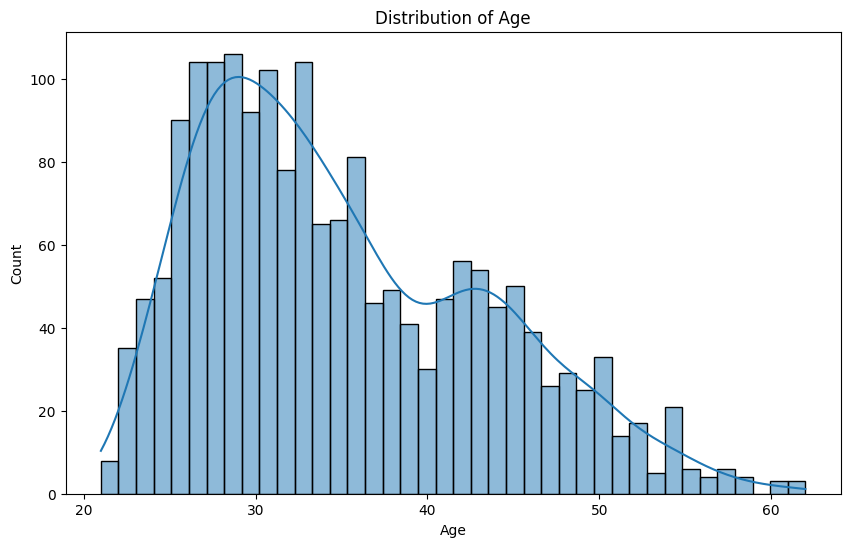

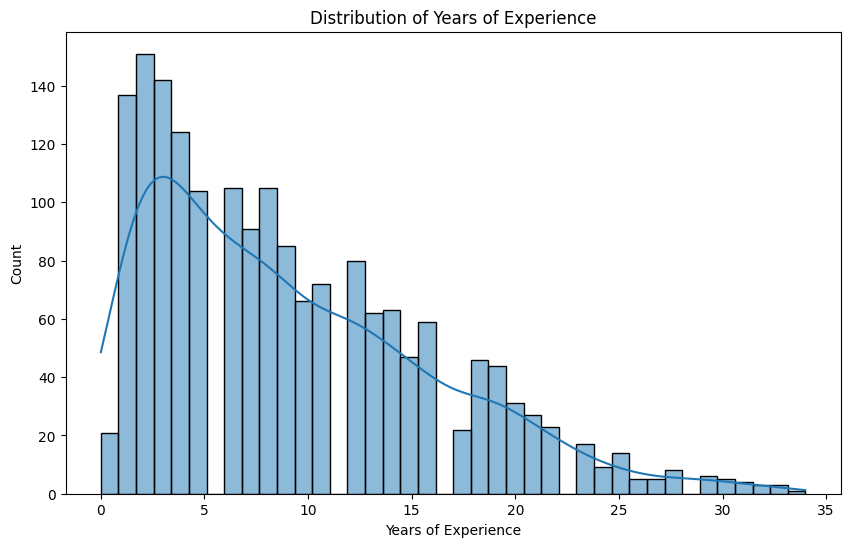

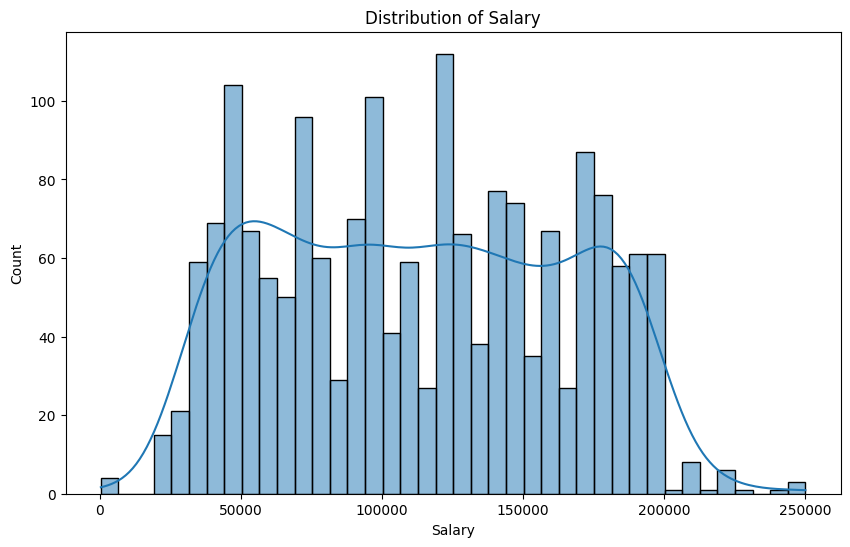

In [6]:
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_clean, x=col, kde=True, bins = 40)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

It can be noted how there are some outliers in the low values of salaries, while the distributions of age and years of experience seem reasonable.

In [7]:
print("Salaries ordered:", df_clean['Salary'].sort_values(ascending=True)[:20])

Salaries ordered: 248       350.0
1396      500.0
647       550.0
917       579.0
1433    25000.0
1456    25000.0
1473    25000.0
1452    25000.0
1324    25000.0
1317    25000.0
1257    25000.0
1516    25000.0
1428    25000.0
1264    25000.0
1251    25000.0
1477    25000.0
1233    25000.0
1334    25000.0
1242    25000.0
1273    26000.0
Name: Salary, dtype: float64


The first 4 salaries are removed since they are considered outliers, as they are very far from the other values. The lower higher values can be considered plausible.

In [8]:
df_clean = df_clean[df_clean["Salary"] >= 24000].reset_index(drop=True)

Analyzing now categorical features.

In [9]:
for col in categorical_columns:
    print(f"\nNumber of unique values in {col}:", df_clean[col].nunique())
    print(f"Value counts for", df_clean[col].value_counts())


Number of unique values in Gender: 3
Value counts for Gender
Male      964
Female    812
Other       7
Name: count, dtype: int64

Number of unique values in Education Level: 7
Value counts for Education Level
Bachelor's Degree    504
Master's Degree      446
PhD                  339
Bachelor's           261
Master's             122
High School          110
phD                    1
Name: count, dtype: int64

Number of unique values in Job Title: 191
Value counts for Job Title
Software Engineer Manager    126
Full Stack Engineer          122
Senior Software Engineer      96
Senior Project Engineer       95
Back end Developer            81
                            ... 
IT Support                     1
Social Media Specialist        1
Office Manager                 1
Principal Engineer             1
Sales Operations Manager       1
Name: count, Length: 191, dtype: int64


The Gender column should be kept as is, since it is ethically important to include every category, even when some have very few samples. Excluding the "Other" category would prevent the model from properly representing and predicting individuals who identify as non-binary. 

For what regards the Education Level, it is clear that many features can be aggregated since they represent the same thing (eg. Master's and Master's Degree)

In [10]:
mapping_education = {
    "phD": "PhD",
    "Bachelor's": "Bachelor's Degree",
    "Master's": "Master's Degree"
}

df_clean['Education Level'] = df_clean['Education Level'].replace(mapping_education)
print("\nAfter mapping Education Level, unique values:", df_clean['Education Level'].unique())


After mapping Education Level, unique values: ["Bachelor's Degree" "Master's Degree" 'PhD' 'High School']


For what regards the Job title, many different features are present, so it could be useful to check if some less present features can be mapped in a category of "other":

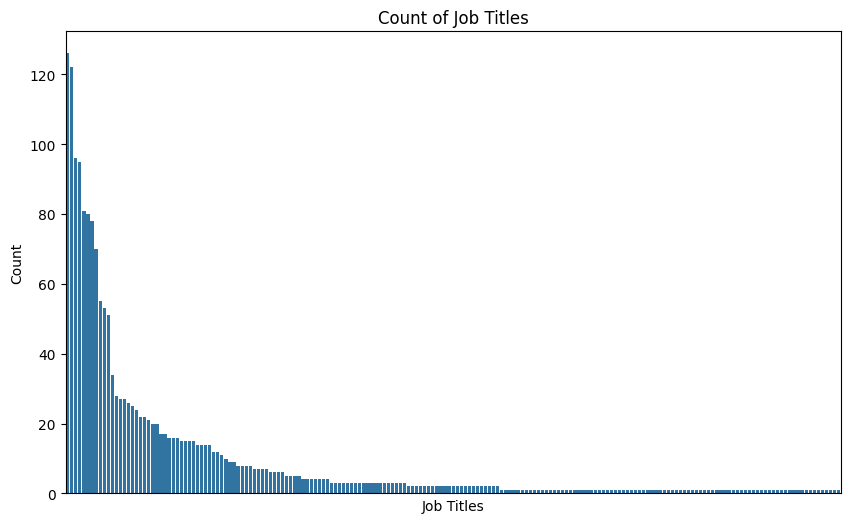

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='Job Title', order=df_clean['Job Title'].value_counts().index)
plt.title('Count of Job Titles')
plt.xlabel('Job Titles')
plt.ylabel('Count')
plt.xticks([])  # Nasconde le etichette sull'asse x
plt.show()

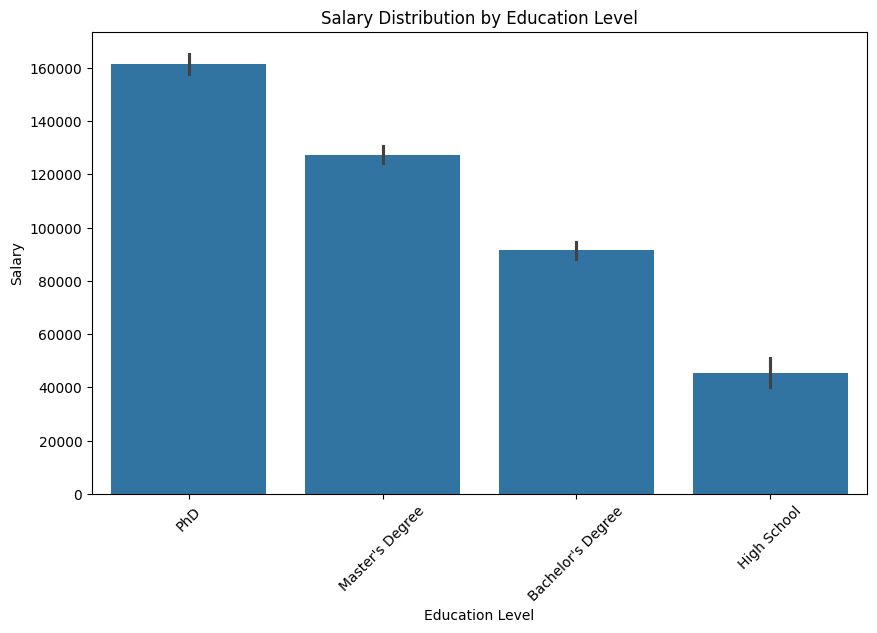

In [12]:
# Plotting salary vs education level (x_order : ['PhD', "Master's Degree", "Bachelor's Degree", "High School"]) not as boxplot just as columns
plt.figure(figsize=(10, 6))

sns.barplot(data=df_clean, x='Education Level', y='Salary', order=['PhD', "Master's Degree", "Bachelor's Degree", "High School"])
plt.title('Salary Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()

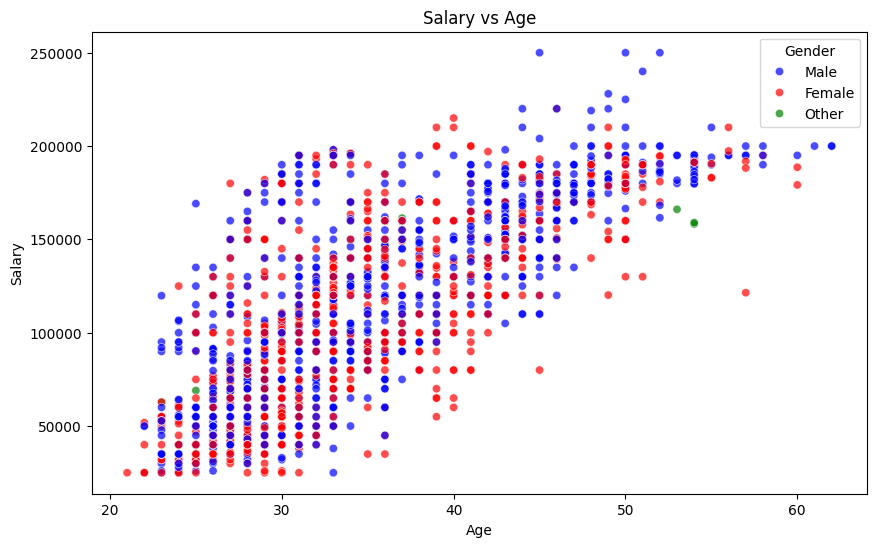

In [13]:
# plot salary vs age (evidenciate in red women and in blue men)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='Age', y='Salary', hue='Gender', palette={'Male': 'blue', 'Female': 'red', 'Other': 'green'}, alpha=0.7)
plt.title('Salary vs Age')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()


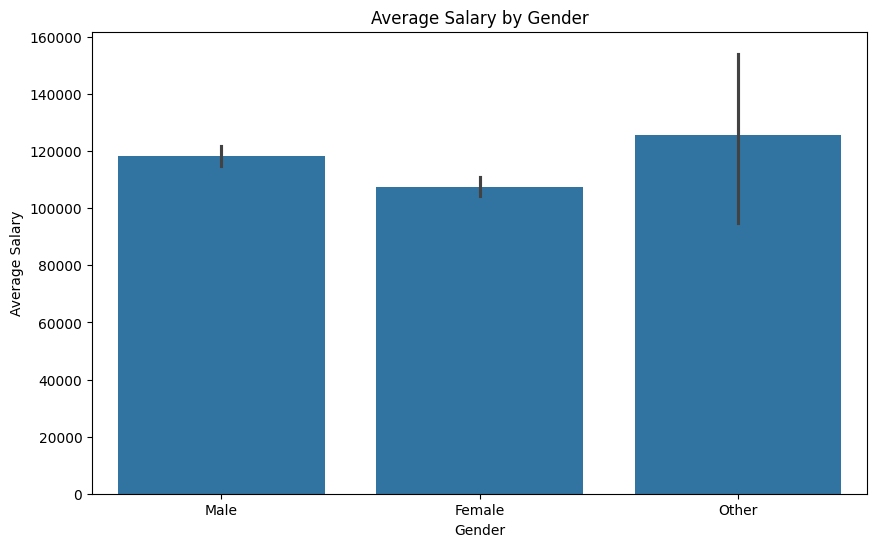

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_clean, x='Gender', y='Salary', order=['Male', 'Female', 'Other'])
plt.title('Average Salary by Gender')
plt.xlabel('Gender')   
plt.ylabel('Average Salary')
plt.show()

/tmp/ipykernel_15700/2880261891.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Gender', y='Salary', palette={'Male': 'blue', 'Female': 'red', 'Other': 'green'})


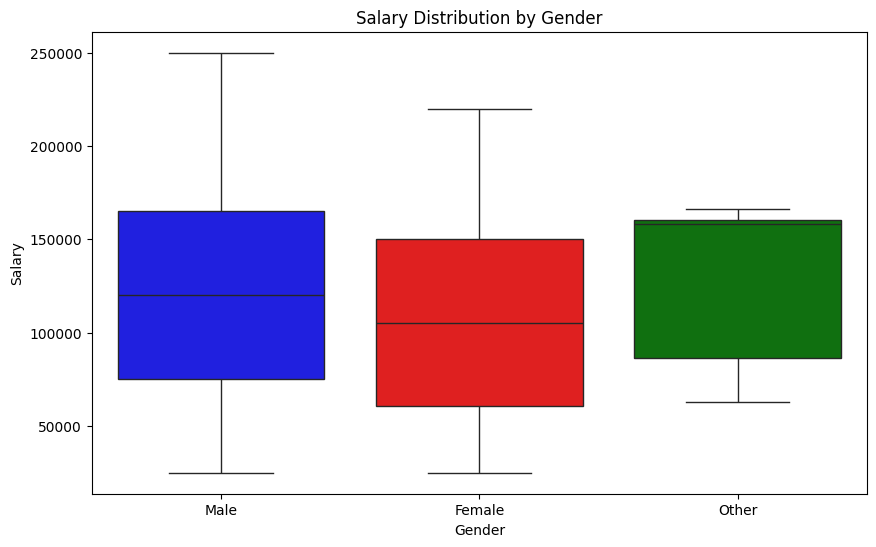

In [15]:
# plot salary distribution by gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x='Gender', y='Salary', palette={'Male': 'blue', 'Female': 'red', 'Other': 'green'})
plt.title('Salary Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()

In [16]:
print(df_clean.groupby('Gender')['Salary'].describe())


        count           mean           std      min      25%       50%  \
Gender                                                                   
Female  812.0  107557.778325  50547.289889  25000.0  60750.0  105000.0   
Male    964.0  118300.164938  51629.891895  25000.0  75000.0  120000.0   
Other     7.0  125819.000000  46006.694680  62852.0  86579.5  158254.0   

             75%       max  
Gender                      
Female  150000.0  220000.0  
Male    165000.0  250000.0  
Other   160179.5  166109.0  


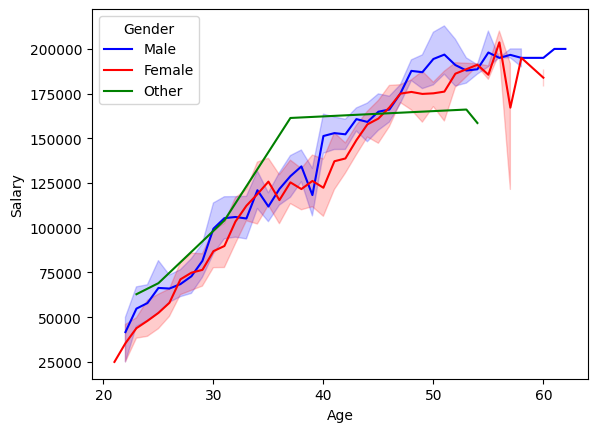

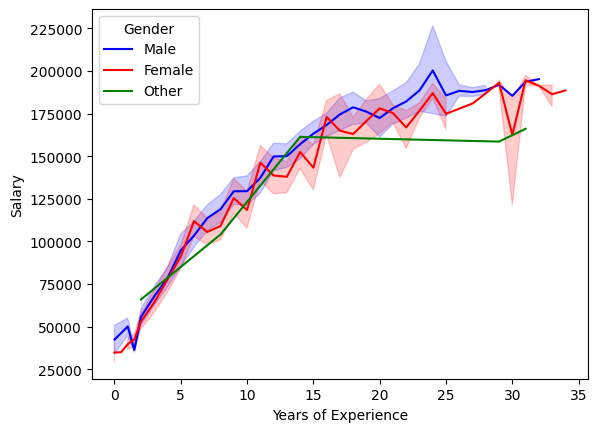

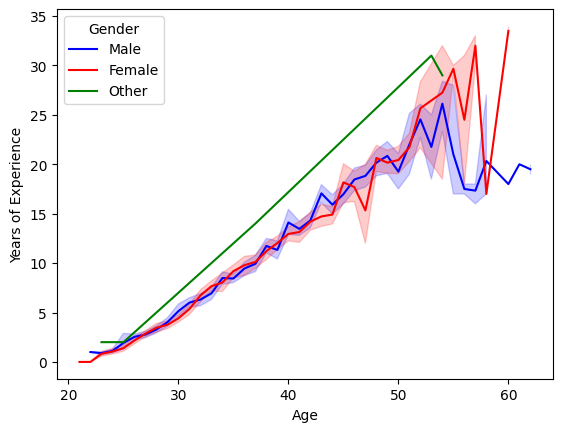

In [17]:
sns.lineplot(data=df_clean, x='Age', y='Salary', hue='Gender', palette={'Male': 'blue', 'Female': 'red', 'Other': 'green'})
plt.show()

sns.lineplot(data=df_clean, x='Years of Experience', y='Salary', hue='Gender', palette={'Male': 'blue', 'Female': 'red', 'Other': 'green'})
plt.show()

sns.lineplot(data=df_clean, x='Age', y='Years of Experience', hue='Gender', palette={'Male': 'blue', 'Female': 'red', 'Other': 'green'})
plt.show()

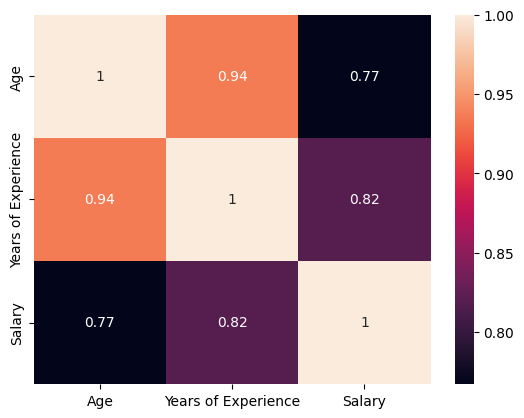

In [18]:
sns.heatmap(df_clean.select_dtypes(include='number').corr(), annot=True)
plt.show()

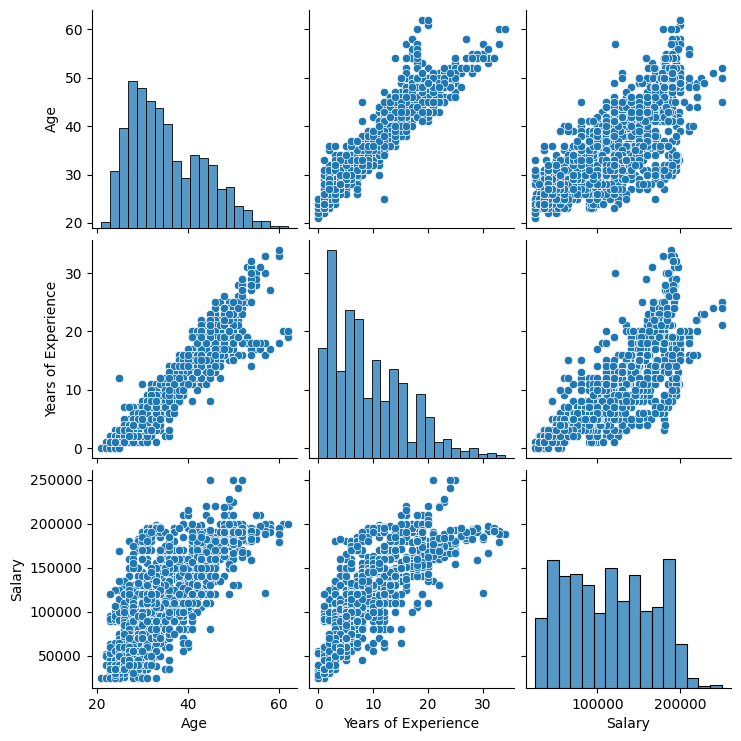

In [19]:
sns.pairplot(data=df_clean)
plt.show()

In [20]:
# save as txt file the list of unique job titles (all in lowercase)
import re

def clean_title(title):
    t = title.lower()
    t = re.sub(r"[- ]?front[- ]?end", "frontend", t)
    t = re.sub(r"[- ]?back[- ]?end", "backend", t)
    t = re.sub(r"[- ]?full[- ]?stack", "fullstack", t)
    t = re.sub(r"\b(of|and|the|a|an|for|to)\b", "", t)
    t = re.sub(r"\s+", " ", t).strip()
    return t

df_clean_titles = df_clean["Job Title"].copy()
df_clean_titles["Job Title"] = df_clean["Job Title"].apply(clean_title)


job_titles = df_clean_titles['Job Title'].str.lower().unique()
with open('job_titles.txt', 'w') as f:
    for title in job_titles:
        f.write(title + '\n')

In [21]:
# list of unique words and their frequency
unique_words = df_clean_titles['Job Title'].str.lower().str.split().explode().value_counts()
with open('unique_words.txt', 'w') as f:
    for word, count in unique_words.items():
        f.write(f"{word}: {count}\n")

print("Number of unique words in the Job Title column:", len(unique_words))
print("\nFirst 25 most common words:", unique_words.head(25))

Number of unique words in the Job Title column: 92

First 25 most common words: Job Title
engineer       532
manager        474
senior         366
software       344
developer      238
marketing      228
junior         176
data           163
sales          136
analyst        126
fullstack      122
project        119
scientist      119
director       117
product         93
hr              90
backend         81
frontend        74
coordinator     71
financial       59
operations      53
web             50
associate       46
human           44
resources       43
Name: count, dtype: int64


In [22]:
# First of all we add a new column for the seniority level:
def add_seniority_column(df, col="Job Title"):
    def get_seniority(title):
        title = title.lower()
        if "senior" in title:
            return "Senior"
        elif "junior" in title:
            return "Junior"
        else:
            return "None"
    df["Seniority"] = df[col].apply(get_seniority)
    return df

df_clean = add_seniority_column(df_clean)
df_clean.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Seniority
0,32.0,Male,Bachelor's Degree,Software Engineer,5.0,90000.0,None
1,28.0,Female,Master's Degree,Data Analyst,3.0,65000.0,None
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Senior
3,36.0,Female,Bachelor's Degree,Sales Associate,7.0,60000.0,None
4,52.0,Male,Master's Degree,Director,20.0,200000.0,None


In [23]:
def add_area_column(df, col="Job Title"):
    def extract_area(title):
        title = title.lower()

        if any(k in title for k in ["software", "developer", "engineer", "frontend", "backend", "fullstack", "web"]):
            return "Software"
        if any(k in title for k in ["data", "scientist", "analyst", "science"]):
            return "Data"
        if any(k in title for k in ["hr", "human resources", "recruiter", "people"]):
            return "HR"
        if any(k in title for k in ["marketing", "social media", "seo", "digital"]):
            return "Marketing"
        if any(k in title for k in ["sales", "account manager", "business development"]):
            return "Sales"
        if any(k in title for k in ["support", "service", "help desk", "customer"]):
            return "Support"
        if any(k in title for k in ["project", "operations", "coordinator"]):
            return "Operations"
        if any(k in title for k in ["manager", "director", "executive", "chief", "ceo", "vp"]):
            return "Management"
        return "other"

    df["Area"] = df[col].apply(extract_area)
    return df

df_clean = add_area_column(df_clean)
df_clean.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Seniority,Area
0,32.0,Male,Bachelor's Degree,Software Engineer,5.0,90000.0,None,Software
1,28.0,Female,Master's Degree,Data Analyst,3.0,65000.0,None,Data
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Senior,Management
3,36.0,Female,Bachelor's Degree,Sales Associate,7.0,60000.0,None,Sales
4,52.0,Male,Master's Degree,Director,20.0,200000.0,None,Management


In [24]:
# print frequency of "seniority" and of "area"
print(df_clean["Seniority"].value_counts())
print("\n")
print(df_clean["Area"].value_counts())

Seniority
None      1241
Senior     366
Junior     176
Name: count, dtype: int64


Area
Software      776
Data          254
Marketing     215
Sales         149
HR            137
Management    119
Operations     69
other          51
Support        13
Name: count, dtype: int64


<Axes: xlabel='Area', ylabel='Salary'>

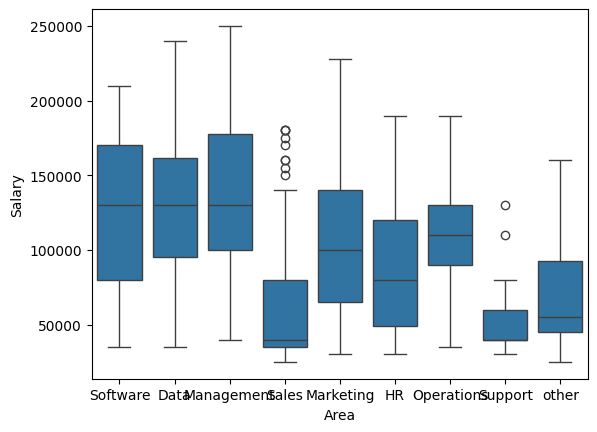

In [25]:
sns.boxplot(data=df_clean, x="Area", y="Salary")

In [26]:
print(df_clean.groupby('Area')['Salary'].describe())

            count           mean           std      min       25%       50%  \
Area                                                                          
Data        254.0  127866.141732  48247.691330  35000.0   95000.0  130000.0   
HR          137.0   86737.226277  41992.343503  30000.0   49000.0   80000.0   
Management  119.0  135798.319328  50641.742652  40000.0  100000.0  130000.0   
Marketing   215.0  107167.441860  46813.508120  30000.0   65000.0  100000.0   
Operations   69.0  111956.521739  40436.018736  35000.0   90000.0  110000.0   
Sales       149.0   61456.375839  39814.686144  25000.0   35000.0   40000.0   
Software    776.0  125518.051546  48314.888923  35000.0   80000.0  130000.0   
Support      13.0   56538.461538  31250.641019  30000.0   40000.0   40000.0   
other        51.0   72117.647059  38245.338047  25000.0   45000.0   55000.0   

                 75%       max  
Area                            
Data        161500.0  240000.0  
HR          120000.0  190000.0 

In [30]:
# df_clean = df_clean.drop(columns=['Job Title'])
df_clean.head(20)

,Age,Gender,Education Level,Years of Experience,Salary,Seniority,Area
0,32.0,Male,Bachelor's Degree,5.0,90000.0,None,Software
1,28.0,Female,Master's Degree,3.0,65000.0,None,Data
2,45.0,Male,PhD,15.0,150000.0,Senior,Management
3,36.0,Female,Bachelor's Degree,7.0,60000.0,None,Sales
4,52.0,Male,Master's Degree,20.0,200000.0,None,Management
5,29.0,Male,Bachelor's Degree,2.0,55000.0,None,Data
6,42.0,Female,Master's Degree,12.0,120000.0,None,Management
7,31.0,Male,Bachelor's Degree,4.0,80000.0,None,Sales
8,26.0,Female,Bachelor's Degree,1.0,45000.0,None,Marketing
9,38.0,Male,PhD,10.0,110000.0,Senior,Data


In [31]:
df_prediction = df_clean.copy()


from sklearn.preprocessing import OrdinalEncoder
# Colonne categoriche da codificare
cat_cols = ["Gender", "Education Level", "Seniority", "Area"]
enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
df_prediction[cat_cols] = enc.fit_transform(df_prediction[cat_cols])


In [32]:
# Colonne numeriche + codificate
features = ["Age", "Gender", "Education Level", "Years of Experience", "Seniority", "Area"]
target = "Salary"

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(df_prediction[features], df_prediction[target], test_size=0.2, random_state=42)

In [47]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Mean Squared Error: 396196276.97
R² Score: 0.85


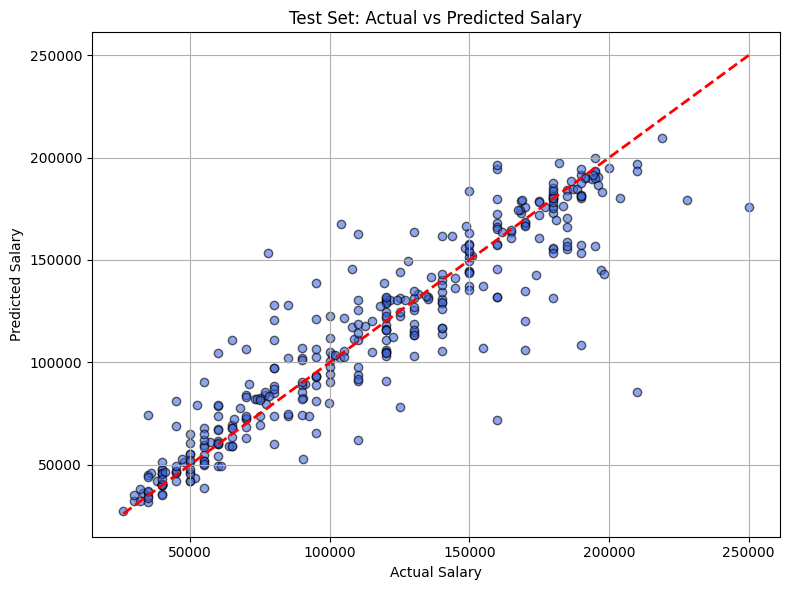

In [52]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='royalblue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Test Set: Actual vs Predicted Salary")
plt.grid(True)
plt.tight_layout()
plt.show()

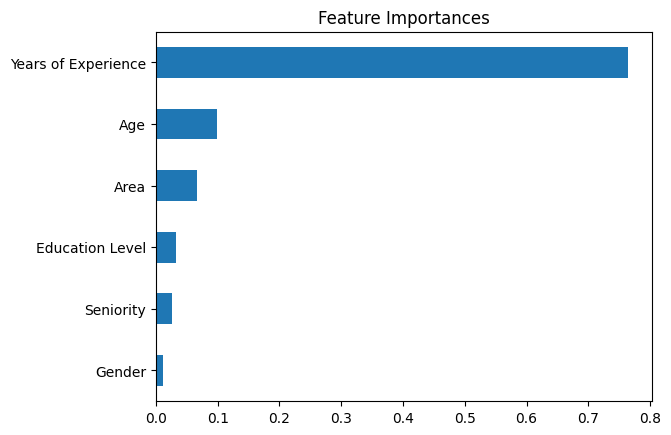

In [39]:
import matplotlib.pyplot as plt

feat_importances = pd.Series(model.feature_importances_, index=features)
feat_importances.sort_values().plot(kind='barh')
plt.title("Feature Importances")
plt.show()


Train Mean Squared Error: 81489290.22
Train R² Score: 0.97


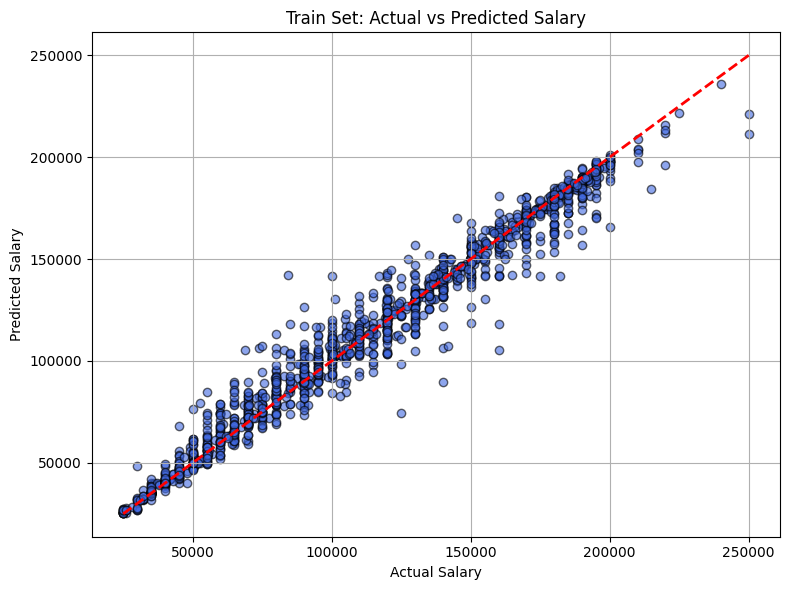

In [50]:
# Train set prediction plot
y_pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f"Train Mean Squared Error: {mse_train:.2f}")
print(f"Train R² Score: {r2_train:.2f}")

import matplotlib.pyplot as plt

# Predizioni già ottenute:
# y_pred_train = model.predict(X_train)

plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train, alpha=0.6, color='royalblue', edgecolor='k')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Train Set: Actual vs Predicted Salary")
plt.grid(True)
plt.tight_layout()
plt.show()


In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
import numpy as np

# --- PREPROCESSING ---
df_model = df_clean.copy()

cat_cols = ["Gender", "Education Level", "Seniority", "Area"]
enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
df_model[cat_cols] = enc.fit_transform(df_model[cat_cols])

features = ["Age", "Gender", "Education Level", "Years of Experience", "Seniority", "Area"]
target = "Salary"
X = df_model[features]
y = df_model[target]

# --- GRIDSEARCH ---
param_grid = {
    "n_estimators": [25, 50, 100],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X, y)

# --- RISULTATI ---
print("Best params:", grid_search.best_params_)
print("Best MSE (neg):", grid_search.best_score_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


KeyboardInterrupt: 